# Part I - (Exploring the 'Loan Data from Prosper' dataset)
## by (Muhammad Tareq Mahmud)

## Introduction
>This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.
This dataset will be used to answer certain questions like: 
  1. What factors affect a loan’s outcome status?
  2. What affects the borrower’s APR or interest rate?
  3. Are there differences between loans depending on how large the original loan amount was?


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
# Setting up the Dataframe and conducting some intital data wrangling woth the dataset provided
df= pd.read_csv('loan.csv')
print(df.shape)
print(df.isnull().sum().sum())


(113937, 81)
1364086


In [3]:

df.head()


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### What is the structure of your dataset?

> The dataset contains 113937 rows and 81 variables/columns in total. This dataset contains 1364086 null values in total. 

### What is/are the main feature(s) of interest in your dataset?

> I have not selected ahy specific variables to work with rather will be working with the entire dataset means 81 variables from the original dataset which contain 113937 rows. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I am going work with the full dataset but there are certain columns which will be used frequently:
*'Term','LoanStatus','BorrowerAPR','BorrowerRate','LenderYield','ProsperScore','ListingCategory (numeric)','Occupation','EmploymentStatus','IsBorrowerHomeowner','CreditScoreRangeLower',
'CreditScoreRangeUpper','InquiriesLast6Months','TotalInquiries','IncomeRange','LoanOriginalAmount','MonthlyLoanPayment'*

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


##### Question 1: Which Employment status gets the loan most of the times?
##### Code for visualization

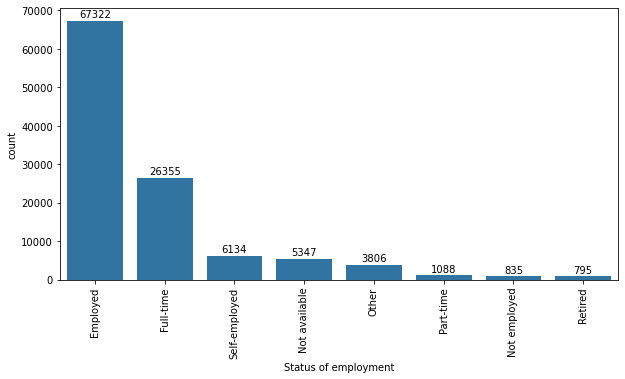

In [5]:
# Using Barchart from Seaborn to see Which Employment status gets the loan most of the times
def most_loans():
    '''
    This barchart is using the one column from the dataset: 'EmploymentStatus' to get an idea which employment status get the 
    loan most of the times.
    '''
    plt.figure(figsize=[10,5])
    order= df.EmploymentStatus.value_counts().index
    color=sb.color_palette()[0]
    sb.countplot(x=df.EmploymentStatus, order=order, color=color)
    values_status= df.EmploymentStatus.value_counts()
    plt.xticks(rotation=90)
    plt.xlabel('Status of employment')
    for i in range (values_status.shape[0]):
        count= values_status[i]
        plt.text(i,count+3000,count,va= 'top',ha= 'center')
    plt.show()
    
most_loans()


##### Observation 1: 
People, who are employed gets the loan most of the times followed by Full-time employment status. Interestingly, people with not-employment status get loans more than those who are retired or doing part-time jobs. 

##### Question 2: Most of the borrowers belog to which state?
##### Code for visualization

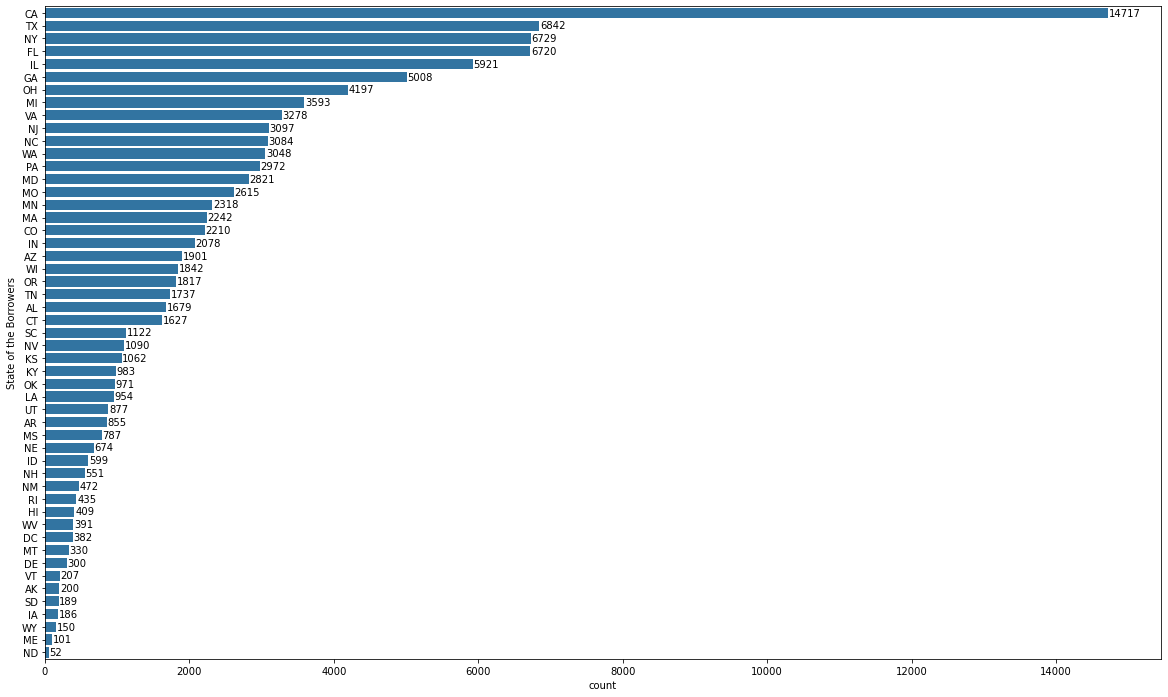

In [6]:
# Use Horizontal barchart to display from which state most of the borrowers take loans
def top_city():
    '''
    Using Seaborn's countplot to display the barchart on the 'BorrowerState' column in the y-axis to display the barchart.
    This has also used Matplotlib to create label for the chart and have used a for loop to display the number for
    each bar on the displayed barchart.
    '''
    plt.figure(figsize=[20,12])
    sb.countplot(y=df.BorrowerState, color= sb.color_palette()[0], order= df.BorrowerState.value_counts().index)
    values_state= df.BorrowerState.value_counts()
    plt.ylabel ('State of the Borrowers')
    for i in range (values_state.shape[0]):
        count= values_state[i]
        plt.text(count+10,i,count, va= 'center')
top_city()

##### Observation 2: 
The above chart displays that most of the borrower who takes loan are from California, followed by New York and Texas

##### Question 3: If most of the borrowers are homeowners?
##### Code for visualization

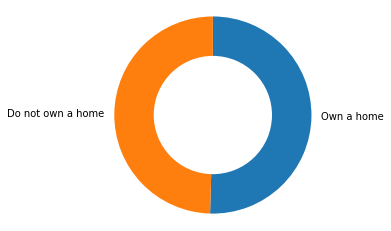

In [7]:
# Display the  visual difference bewteen those who own a house and who dies not
def home_ownership():
    '''
    As the values of the the column 'IsBorrowerHomeowner' is divided into Yes or No, it is pertinent to use a 'pie-chart'
    for visually projecting who owns a house and who does not. This will use Matplotlib's pie-chart on the colimn of 'IsBorrowerHomeowner'
    from the dataset.
    '''
    home_owner_sorted= df.IsBorrowerHomeowner.value_counts()
    home_owner_sorted
    label= ['Own a home', 'Do not own a home']
    plt.pie(home_owner_sorted, labels= label, startangle=90, counterclock=False, wedgeprops={'width':.4});
    plt.axis('square');
home_ownership()

##### Observation 3: 
 The number of borrowers who own a home and who do not own a home are almost similar even though the borrowers who own a home has a slight edge of getting the loan. The above displayed Donut chart shows that even though most of the borrower own a home but owning a home is not the only criteria of getting a lone.

##### Question 4: Interest rate of the loans?
##### Code for visualization

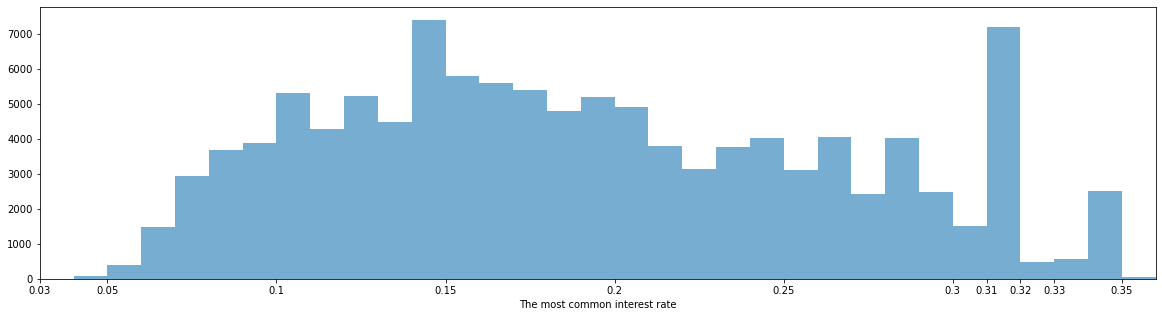

In [8]:
# display the most frequent used interest rate for the loans
def common_interest_rate():
    '''
    This has used Matplotlib to display the histogram on the column 'BorrowerRate' from the dataset to display the most
    frequent rate for the dispersed loan. As the chart was taking too much space in the x-axis, I have also used Matplotlib's
    xlim function to cut the unnecessary part in the x-axis. 
    '''
    bins= np.arange(.04,.36+.4,.01)
    plt.figure(figsize=[20,5])
    plt.hist(data=df,x='BorrowerRate',bins=bins, alpha=.6);
    plt.xlim(0.03,.36);
    xticks=[.03,.05,.10,.15,.2,.25,.30,.31,.32,.33,.35]
    plt.xticks(xticks,xticks);
    plt.xlabel('The most common interest rate');
common_interest_rate()

##### Observation 4: 
The above Histogram displays that the most of the clients or borrows received the loan with an interest rate between .31 to .32. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Used the value_counts() on the BorrowerState and EmploymentStatus to figure out most of the borrowers belong to which state and to which employment status. Later their values and index were used to produce barchart. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> No.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

##### Question 5: Borrower with which Income Range get Highest amount of Loan (on an average/median)?
##### Code for visualization

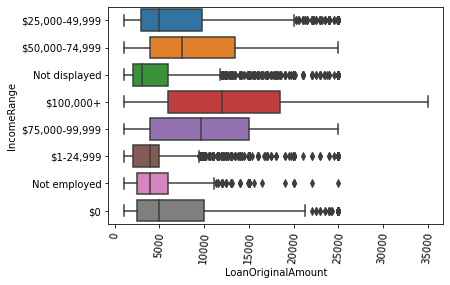

In [9]:
# use boxplot to display the highest mean amount of loan based on income range
def highest_mean_loan():
    '''
    To display the highest mean amount of original loan amount based on income range, I have used seaborn's boxplot 
    within which I have passed 'LoanOriginalAmount' column in the x-axis and 'IncomeRange' column in the y-axis. 
    '''
    sb.boxplot(data=df, y= 'IncomeRange',x= 'LoanOriginalAmount')
    plt.xticks(rotation=85);
highest_mean_loan()

##### Observation 5: 
The above Boxplot is displaying the relation between the Income Range and Original Loan Amount. It projects that if the income range in more than or equal to $100,000 then the borrower gets the highest amount of loan (on an average). The overall boxplot is trying to depicts that how much a borrower will get as loan amount is dependent on his/her/their income range.

##### Question 6: What is the income range of different Employmnet Status? 
##### Code for visualization

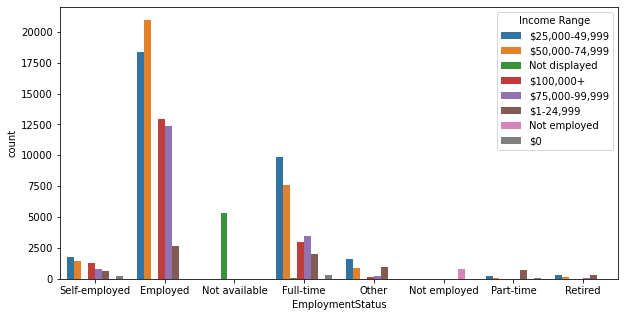

In [10]:
# display the distribution of different income range based on employment status
def highest_income():
    '''
    I have reshaped the figure of the graph first, so that the bars within the figure do not get cluttered. 
    Then I have applied seaborn's countplot finction. on x-axis i have placed 'EmploymentStatus' and on the y-axis
    I have placed 'IncomeRange' to display the clustered bar chart. later I have used Matplotlib's legend function to 
    display the income range to increase the readability of the chart.
    '''
    plt.figure(figsize=[10,5])
    sb.countplot(data=df, x='EmploymentStatus', hue='IncomeRange');
    plt.legend( title = "Income Range");
highest_income()

##### Observation 6: 
The above displayed clustered barchart shows that the income range of the 'Employed' Employmnet status is the hoghest among all the other employment status. 

##### Question 7: Comparing IncomeRange based on different EmploymentStatus
##### Code for visualization

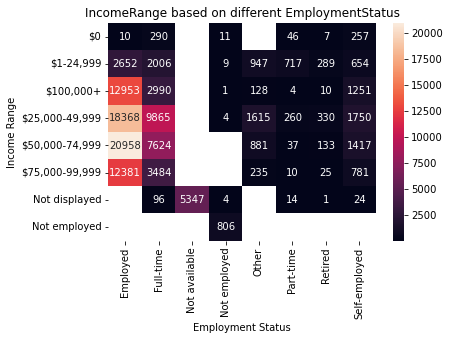

In [11]:
# display the comparison of income range based on different employment status
def income_employment_status():
    '''
    I have used the groupby methid on 'EmploymentStatus' and 'IncomeRange' columns to get the size of EmploymentStatus
    based on different Income Range. Then I have used reset_index to rename the size output as 'count',
    then I have used .pivot to reframe the columns, index and values and then displayed them using the 
    heatmap function of seaborn.
    '''
    a= df.groupby(['EmploymentStatus','IncomeRange']).size()
    b= a.reset_index(name='count')
    c=b.pivot(columns='EmploymentStatus', index='IncomeRange', values='count')
    sb.heatmap(c,annot= True, fmt='.0f')
    plt.xlabel('Employment Status')
    plt.ylabel('Income Range')
    plt.title('IncomeRange based on different EmploymentStatus');
    
income_employment_status()

##### Observation 7: 
The above displayed heatmap explains that the Income Range of those who are Employed is higher than any other Employment status. It depicts that thise who are Employed earn more than any other group.               

##### Question 8: Displaying the correlation between the ProsperScore and LoanOriginalAmount
##### Code for visualization

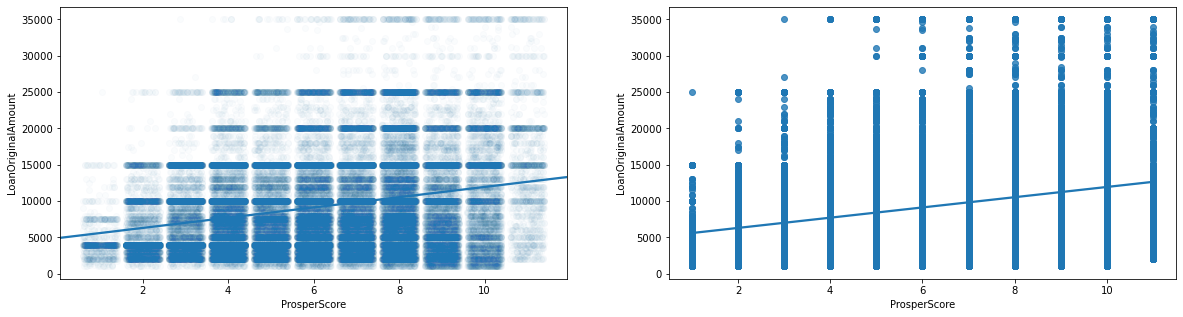

In [12]:
# Display if there is any correlation between Prosper Score and Loan Original Amount
def pscore_loan_amount():
    '''
    I have used seaborn's egplot function and have placed the ProsperScore (x-axis) and LoanOriginalAmount (y-axis) 
    to display the if any correlation exist between these two columns. I have used matplotlib's subplot to showcase the 
    outcome of the graph side by side. The first one is after using the x_jitter parameter and the next one is without the x_jitter.
    '''
    plt.figure(figsize=[20,5])
    plt.subplot(1,2,1)
    sb.regplot(x= df.ProsperScore, y=df.LoanOriginalAmount, truncate= False,x_jitter= .4, scatter_kws={'alpha':.02})
    plt.subplot(1,2,2)
    sb.regplot(x= df.ProsperScore, y=df.LoanOriginalAmount);
pscore_loan_amount()

##### Observation 8: 
The above displayed scatterplot shows that a positive correlation exists between the ProsperScore and LoanOriginalAmount. With the increase of ProsperScore (better prosper score), the chances of LoanOriginalAmount increases.             

##### Question 9: Is there a correlation between LoanOriginalAmount and BorrowerRate?
##### Code for visualization

In [21]:
# display the correlation between LoanOriginalAmount and BorrowerRate
def loanamount_borrowerrate():
    '''
    I have used seaborn's regplot to display the correlation between  'LoanOriginalAmount' and 'BorrowerRate'.
    '''
    sample= np.random.choice(df.shape[0],200,replace=False)
    sample_frame= df.loc[sample]
    sb.regplot(data=sample_frame, y='LoanOriginalAmount', x='BorrowerRate')
    plt.ylabel('Original Loan Amount')
    plt.xlabel('Borrower Rate')
    plt.title('Correlation between LoanOriginalAmount and Borrower Rate');

loanamount_borrowerrate()


NameError: name 'sample_frame' is not defined

##### Observation 9: 
It seems that there is a negative correlation associated between BorrowerRate and Original Loan Amount. It depicts, when the Borrower Rate increases, the loan Original amount decreases because of the assumed financial risk. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Those who belong to the Employed employment status earns more than any other employment status. And those whose income range is more than 100,000, their chance of getting the loan is higher than any other income range. 
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>  One can assume the borrower rate based on the original loan amount. As the loan amount increates the borrower rate decreases. and at the same time, there is a positive correlation between Original loan amount and prosper score. mWith the increased prosper score the chance of getting a high first loan amount increases. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

##### Question 10: Display how 'BorrowerAPR','BorrowerRate','LenderYield','ProsperScore','InquiriesLast6Months','MonthlyLoanPayment' are correlated with the other. 
##### Code for visualization

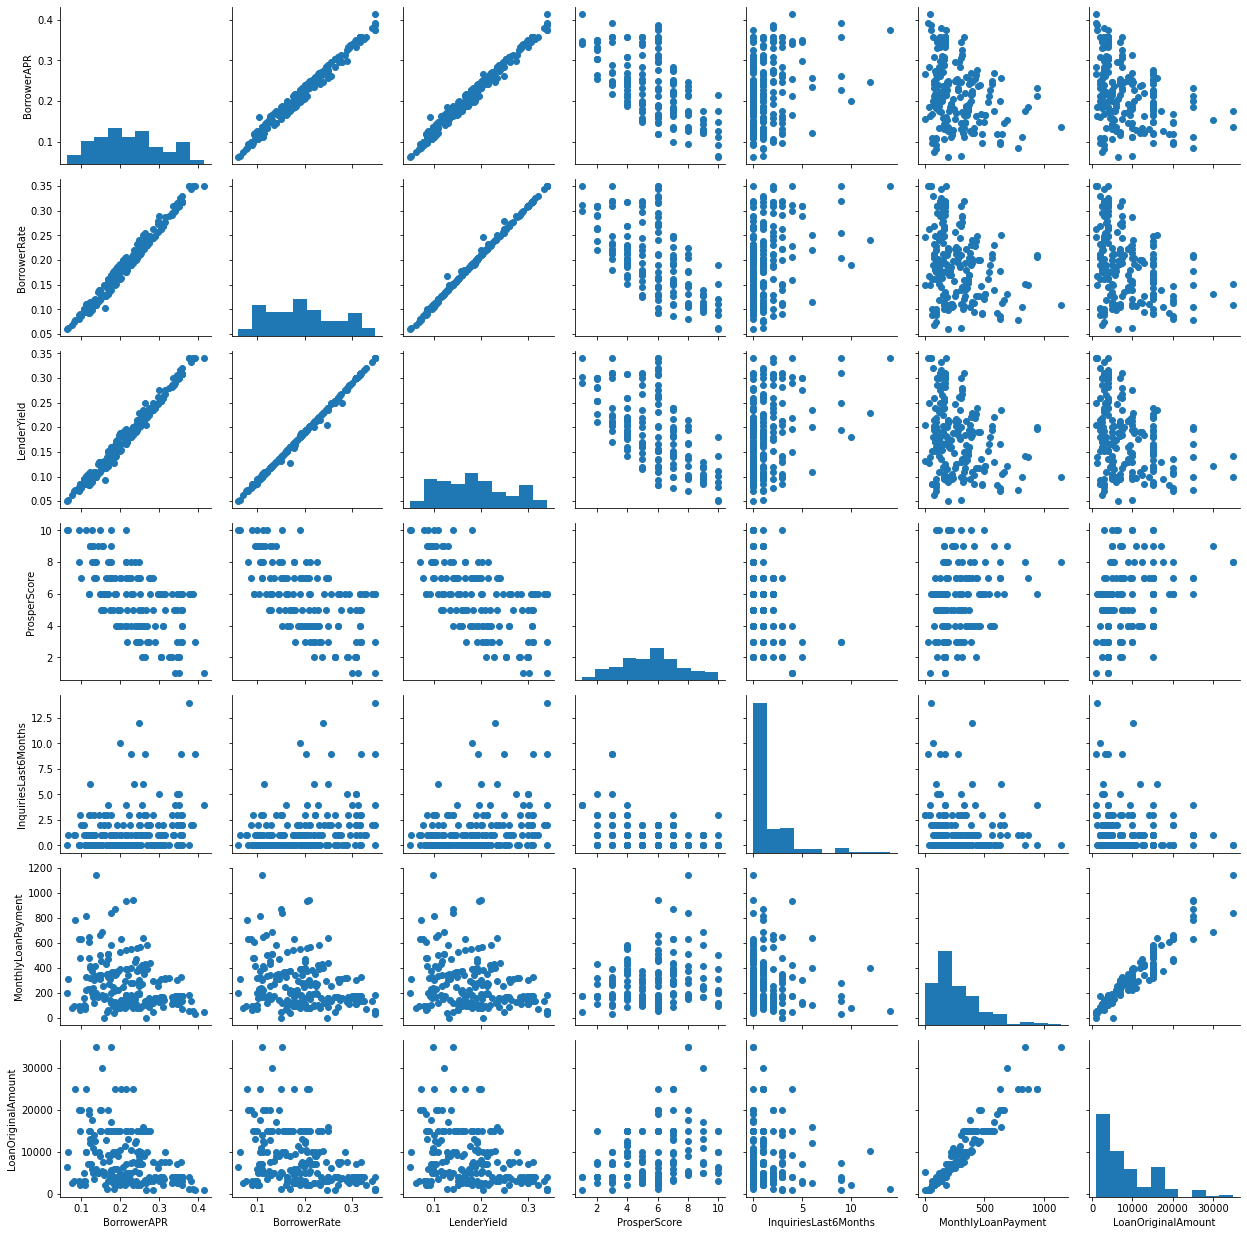

In [14]:
#display pair plot matrices on six relevant numeric columns
def pair_plot_matrices():
    '''
    To understand if there is any significant relationship exists among 'BorrowerAPR','BorrowerRate','LenderYield','ProsperScore','InquiriesLast6Months','MonthlyLoanPayment',
    I have used PairGrid on six mentioned columns to dispaly sccater plots in relation to the other. Later I have used histogram
    to map the diagonals.
    '''
    sample= np.random.choice(df.shape[0],200,replace=False)
    sample_frame= df.loc[sample]
    columns_plot_matrices= ['BorrowerAPR','BorrowerRate','LenderYield','ProsperScore','InquiriesLast6Months','MonthlyLoanPayment','LoanOriginalAmount']
    a= sb.PairGrid(data= sample_frame, vars= columns_plot_matrices)
    a=a.map_offdiag(plt.scatter)
    a.map_diag(plt.hist);
    
pair_plot_matrices()

##### Observation 10: 
The above displayed Pair Matrices shows that there is a positive correlation between BorrowerAPR with LenderYield and BorrowerAPR with BorrowerRate.

##### Question 11: Display how 'BorrowerAPR','BorrowerRate','LenderYield','ProsperScore','InquiriesLast6Months','MonthlyLoanPayment' are correlated with the other.
##### Code for visualization

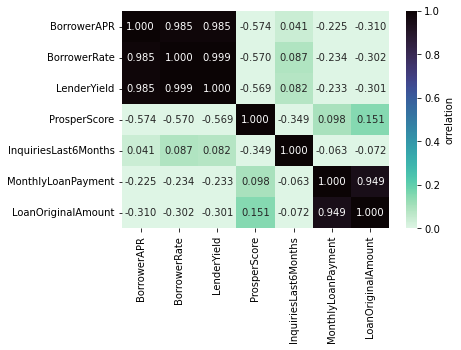

In [16]:
# display pair plot matrices on six relevant numeric columns
def pair_plot_correlation():
    '''
    To understand if there is any significant relationship exists among 'BorrowerAPR','BorrowerRate','LenderYield','ProsperScore','InquiriesLast6Months','MonthlyLoanPayment',
    I have used seaborn's heatmap on six mentioned columns to dispaly the heatmap in relation to the other. 
    '''
    sample= np.random.choice(df.shape[0],200,replace=False)
    sample_frame= df.loc[sample]
    columns_plot_matrices= ['BorrowerAPR','BorrowerRate','LenderYield','ProsperScore','InquiriesLast6Months','MonthlyLoanPayment','LoanOriginalAmount']
    sb.heatmap(sample_frame[columns_plot_matrices].corr(), annot=True, fmt='.3f',cmap= 'mako_r', vmin=0, cbar_kws={'label':'orrelation'});

pair_plot_correlation()

##### Observation 11: 
The above projected heatmap is trying to confirm the same output the Plot Matrices projected. It is depicting that there is a positive correlation between BorrowerAPR with LenderYield and BorrowerAPR with BorrowerRate.

##### Question 12:  What is the mean 'total inqueries'of the different Loan Status  based on dofferent ' Employment Status'?
##### Code for visualization

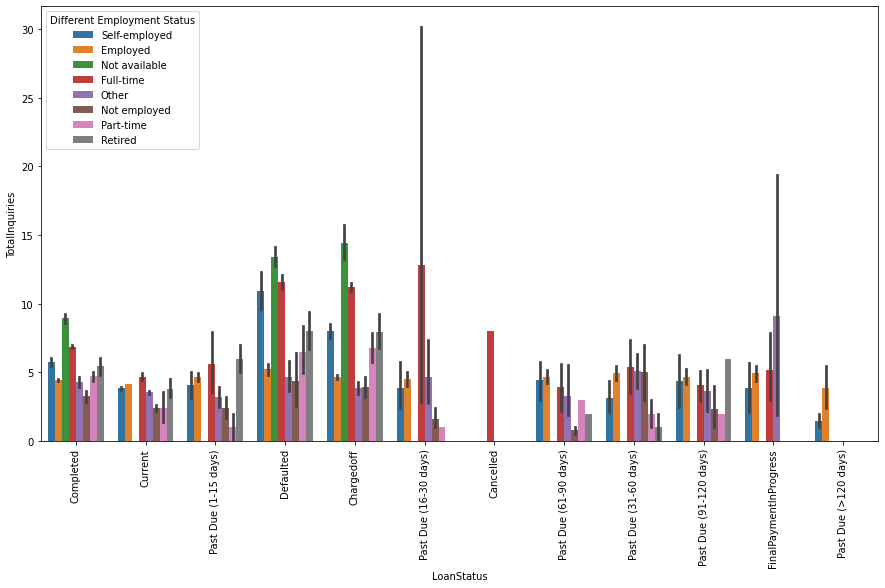

In [17]:
# display the  mean 'total inqueries'of the different Loan Status based on dofferent ' Employment Status'
def mean_inquiries_lstatus_estatus():
    '''
    I have used seaborn's barplot to display the mean 'total inqueries'of the different Loan Status 
    based on dofferent ' Employment Status'
    '''
    plt.figure(figsize=[15,8])
    a= sb.barplot(data=df, x= 'LoanStatus', y= 'TotalInquiries',hue= 'EmploymentStatus')
    plt.xticks(rotation=90)
    a.legend(title= 'Different Employment Status');

mean_inquiries_lstatus_estatus()

##### Observation 12: 
The above displayed adoapted bar chart shows that the mean 'total inqueries'of the Loan Status 'Past Due (16-30 daya)'is higher within the 'Full Time Employment Status'. The mean of the 'Final Payment in Progress' Loan Status is higher within the 'Other' employment Status.

##### Question 13: How the 'Borrower Rate ' of different 'LoanStatus' are distributed based on 'ProsperScore'
##### Code for visualization

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


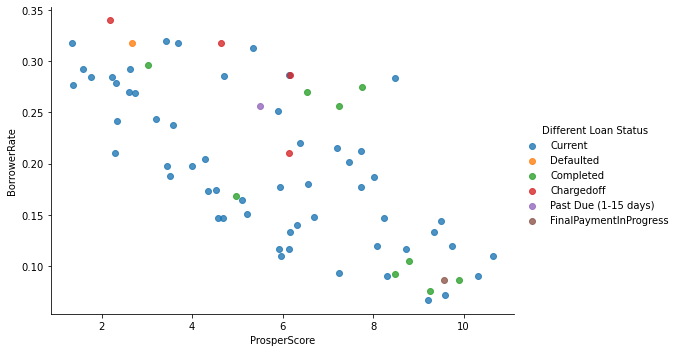

In [18]:
# display the distribution of the 'Borrower Rate ' of different 'LoanStatus' based on 'ProsperScore'
def lstatus_brate_pscore():
    '''
    To accomplish this task, I have used seaborn's FacetGrid's hue on the 'LoanStatus' column (categorical column type)
    and then used the map function of the facetgrid to apply the seaborn's regplot on 'ProsperScore' and 'BorrowerRate'
    with x_jitter to avoid overplotting. 
    '''
    sample= np.random.choice(df.shape[0],100,replace=False)
    sample_frame= df.loc[sample]
    a= sb.FacetGrid(data=sample_frame, hue= 'LoanStatus',size=5, aspect=1.5)
    a=a.map(sb.regplot,'ProsperScore','BorrowerRate', x_jitter=.9, fit_reg=False)
    a.add_legend(title='Different Loan Status');
    
lstatus_brate_pscore();


##### Observation 13: 
The above projected scatter plot displays that the more the propsper score the less the borrower rate. It can be said that the BorrowerRate is higly dependent on the ProsperScore. 

##### Question 14: project how the BorrowerRate depends on ProsperScore based on the LoanStatus and if the borrower has a house or not
##### Code for visualization


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


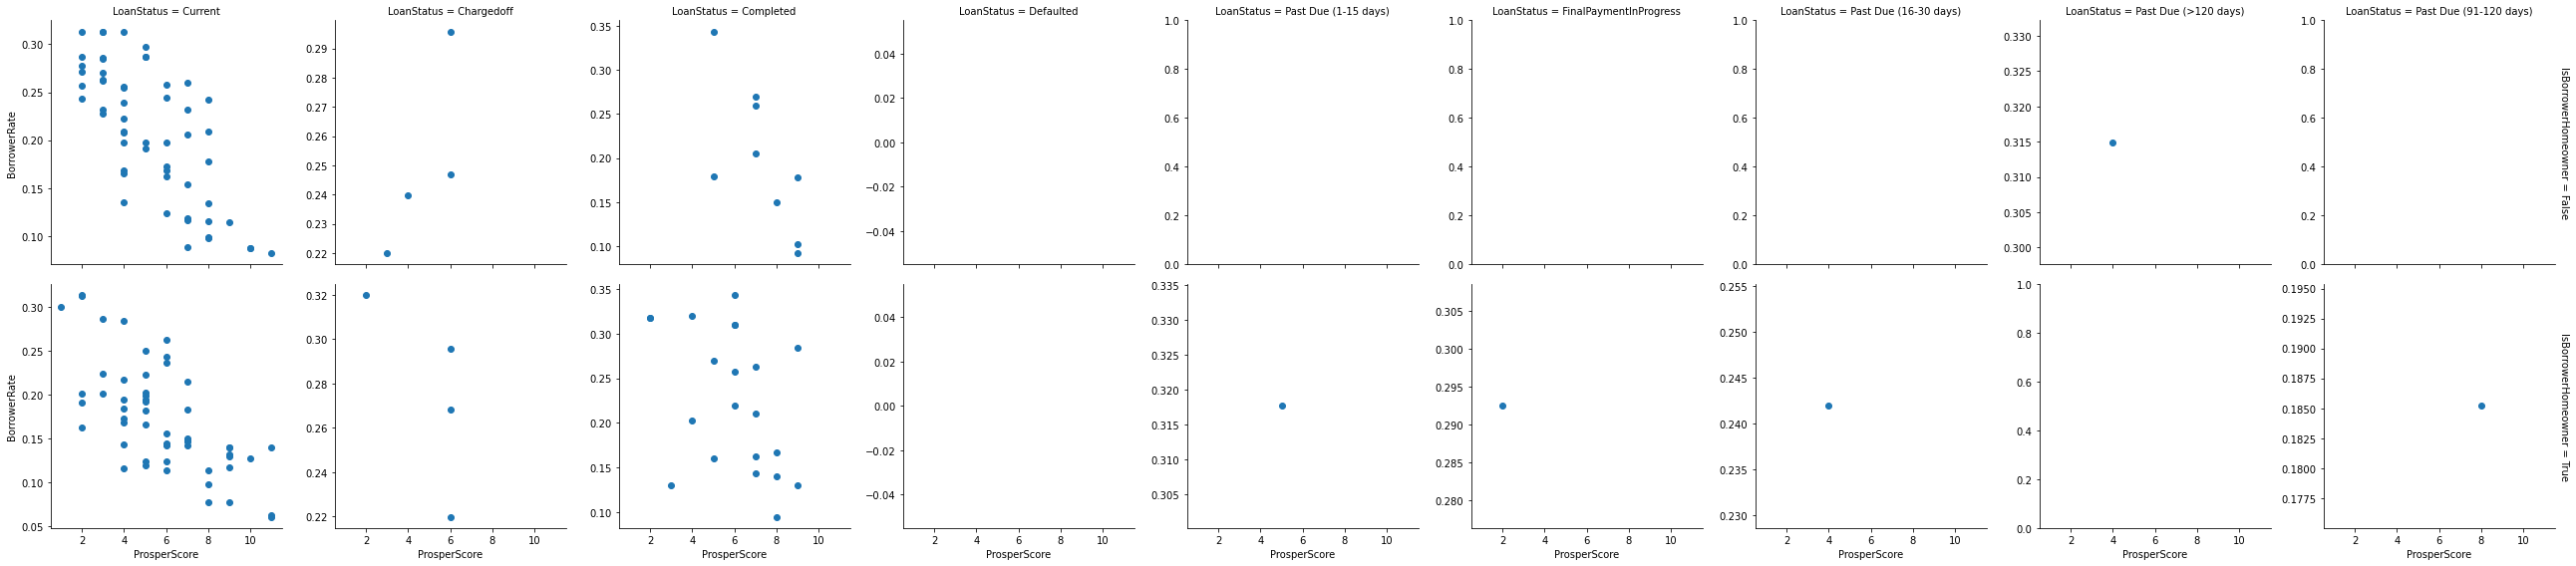

In [19]:
# display how the BorrowerRate depends on ProsperScore based on the LoanStatus and if the borrower has a house or not
def brate_pscore_lstatus_house():
    '''
    I have used seaborn's facetgrid (after randomly choosing 200 output from the dataset) where I have
    places 'loanstatus' in the col parameter, 'IsBorrowerHomeowner' as row parameter and then used the map function
    to plot the scatter plot based on 'ProsperScore' and 'BorrowerRate'. 
    
    '''
    sample= np.random.choice(df.shape[0],200,replace=False)
    sample_frame= df.loc[sample]
    a=sb.FacetGrid(data=sample_frame, col= 'LoanStatus', row= 'IsBorrowerHomeowner', size=4, margin_titles=True, sharey=False)
    a.map(plt.scatter, 'ProsperScore', 'BorrowerRate');
    
brate_pscore_lstatus_house()

##### Observation 14: 
The above displayed two direction facetgrid shows that whether the borrower owns a house or not, in most cases the loan status is either current or completed. And the Rate of the borrower depends on the prosperscore.

##### Question 15: How the 'LoanOriginalAmount' varies depending on the ProsperScore and BorrowerRate?
##### Code for visualization


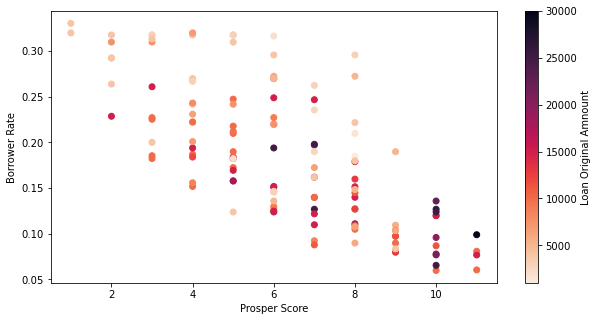

In [20]:
# display how the 'LoanOriginalAmount' varies depending on the ProsperScore and BorrowerRate
def loan_pscore_brate():
    '''
    I have taken 200 random sample from the dataset. Then I have used matplotlib's scatterplot to display 'ProsperScore'
    on the x-axis and 'BorrowerRate' on the y-axis and then color coded the 'LoanOriginalAmount' column. Then I have used
    the cmap argument to decide the color to display the dots of the scatterplot.
    '''
    plt.figure(figsize=[10,5])
    sample= np.random.choice(df.shape[0],200,replace=False)
    sample_frame= df.loc[sample]
    plt.scatter(data=sample_frame, x= 'ProsperScore', y= 'BorrowerRate', c='LoanOriginalAmount', cmap='rocket_r')
    plt.colorbar(label='Loan Original Amnount')
    plt.xlabel('Prosper Score')
    plt.ylabel('Borrower Rate');
    
loan_pscore_brate()

##### Observation 15: 
The above displayed scatterplot shows that the loan amount is higher when the prosper score is between 5 to 10 and at the same time the Borrowe Rtae is also lower. When the prosper score is low, the borrower rate is higher and at the same time the loan amount is lower. 

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Getting a loan is not depedent on wheher a brrower owns a house or nat rather it depends on prosper score, employment status and income range. 

### Were there any interesting or surprising interactions between features?

> It is surprising to see that the borrower with full time employment status are more inquired than the other employment status. And, the Loan Original Amount and Borrower Rate depend on the Borrower's prosper score

## Conclusions
>Those who belong to the 'Employed' employment status earns more than any other employment status. And those whose income range is more than 100,000, their chance of getting the loan is higher than any other income range.  One can assume the borrower rate based on the original loan amount. As the loan amount increases the borrower rate decreases. And at the same time, there is a positive correlation between Original loan amount and prosper score. With the increased prosper score the chance of getting a high first loan amount increases. 
Getting a loan is not depedent on wheher a brrower owns a house or nat rather it depends on prosper score, employment status and income range.It is surprising to see that the borrower with full time employment status are more inquired than the other employment status. And, the Loan Original Amount and Borrower Rate depend on the Borrower's prosper score


In [23]:
!jupyter nbconvert Part_I_exploration_template.ipynb --to HTML --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_I_exploration_template.ipynb to HTML
[NbConvertApp] Writing 1461215 bytes to Part_I_exploration_template.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\ASUS\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\ASUS\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 346, in start
    self.convert_notebooks()
  File "C:\Users\ASUS\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 518, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  F